In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, clear_output
sns.set_style("whitegrid")
%matplotlib inline


# Linear Regression: Fundamentals and Visualization

This notebook explains the fundamental concepts of Linear Regression with step-by-step visualizations:

1. **What is Linear Regression?** - Understanding slope (기울기) and intercept (절편)
2. **Residuals (잔차)** - The difference between predicted and actual values
3. **Squared Error** - Individual squared errors
4. **Sum of Squared Errors (SSE/SSR)** - Total prediction error
5. **Correlation Coefficient (R)** - Linear relationship strength
6. **Coefficient of Determination (R²)** - Explained variance (1 - SSR/SSA)

We'll visualize how changes in slope affect SSR, SSA, and R².


In [ ]:
def generate_data(n_samples=20, noise=0.5, random_state=42):
    """Generate simple 1D regression data."""
    np.random.seed(random_state)
    X = np.linspace(0, 10, n_samples).reshape(-1, 1)
    y = 2 * X.flatten() + 1 + np.random.randn(n_samples) * noise
    return X, y

def compute_ssr_ssa(y_true, y_pred):
    """Compute SSR and SSA."""
    ssr = np.sum((y_true - y_pred) ** 2)
    ssa = np.sum((y_true - np.mean(y_true)) ** 2)
    return ssr, ssa

def compute_r_squared(y_true, y_pred):
    """Compute R²."""
    ssr, ssa = compute_ssr_ssa(y_true, y_pred)
    return 1 - (ssr / ssa) if ssa > 0 else 0, ssr, ssa

def compute_correlation(X, y):
    """Compute correlation coefficient R."""
    X_flat, mean_x, mean_y = X.flatten(), np.mean(X.flatten()), np.mean(y)
    num = np.sum((X_flat - mean_x) * (y - mean_y))
    den = np.sqrt(np.sum((X_flat - mean_x) ** 2) * np.sum((y - mean_y) ** 2))
    return num / den if den > 0 else 0

def setup_plot(ax, xlabel='X', ylabel='y', title='', grid=True):
    """Helper function to setup plot."""
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.set_title(title, fontsize=14, fontweight='bold')
    if grid:
        ax.grid(True, alpha=0.3)


# 1. What is Linear Regression? - Slope and Intercept

Linear Regression finds the best line to fit data: **y = slope * x + intercept**

- **Slope (기울기)**: How much y changes when x increases by 1
- **Intercept (절편)**: The value of y when x = 0


/var/folders/qr/m3v0xxg57h54pkx4d5tpml4c0000gn/T/ipykernel_30534/1153911931.py:63: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/qr/m3v0xxg57h54pkx4d5tpml4c0000gn/T/ipykernel_30534/1153911931.py:63: UserWarning: Glyph 50872 (\N{HANGUL SYLLABLE UL}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/qr/m3v0xxg57h54pkx4d5tpml4c0000gn/T/ipykernel_30534/1153911931.py:63: UserWarning: Glyph 51208 (\N{HANGUL SYLLABLE JEOL}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/qr/m3v0xxg57h54pkx4d5tpml4c0000gn/T/ipykernel_30534/1153911931.py:63: UserWarning: Glyph 54200 (\N{HANGUL SYLLABLE PYEON}) missing from font(s) Arial.
  plt.tight_layout()
/Users/holim/code/DS3-Demo/SKLEARN/ds3ml/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/holim/code/DS3-Demo/SKLEARN/ds3ml/lib/

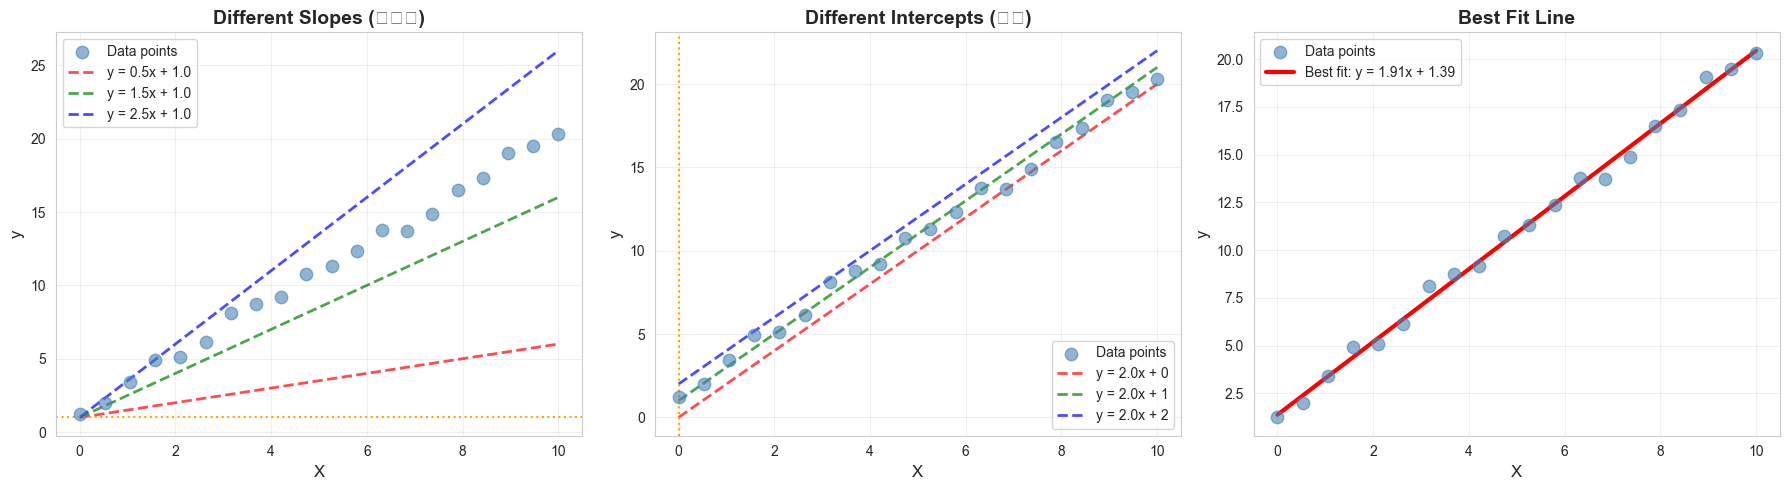

Best fit line: y = 1.905x + 1.387
Slope (기울기): 1.905 - y increases by 1.905 when x increases by 1
Intercept (절편): 1.387 - y value when x = 0


In [ ]:
# Generate data and compute best fit
X, y = generate_data(n_samples=20, noise=0.5, random_state=42)
X_flat = X.flatten()
slope_best = np.sum((X_flat - np.mean(X_flat)) * (y - np.mean(y))) / np.sum((X_flat - np.mean(X_flat)) ** 2)
intercept_best = np.mean(y) - slope_best * np.mean(X_flat)

# Visualize slope and intercept
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Different slopes
ax1 = axes[0]
ax1.scatter(X_flat, y, c='steelblue', alpha=0.6, s=80, label='Data points', zorder=3)
for slope, color in zip([0.5, 1.5, 2.5], ['red', 'green', 'blue']):
    ax1.plot(X_flat, slope * X_flat + 1.0, color=color, linewidth=2, 
            label=f'y = {slope}x + 1.0', linestyle='--', alpha=0.7)
setup_plot(ax1, title='Different Slopes (기울기)')
ax1.legend()
ax1.axhline(y=1.0, color='orange', linestyle=':', linewidth=1.5)

# Different intercepts
ax2 = axes[1]
ax2.scatter(X_flat, y, c='steelblue', alpha=0.6, s=80, label='Data points', zorder=3)
for intercept, color in zip([0, 1, 2], ['red', 'green', 'blue']):
    ax2.plot(X_flat, 2.0 * X_flat + intercept, color=color, linewidth=2, 
            label=f'y = 2.0x + {intercept}', linestyle='--', alpha=0.7)
setup_plot(ax2, title='Different Intercepts (절편)')
ax2.legend()

# Best fit line
ax3 = axes[2]
ax3.scatter(X_flat, y, c='steelblue', alpha=0.6, s=80, label='Data points', zorder=3)
ax3.plot(X_flat, slope_best * X_flat + intercept_best, 'r-', linewidth=3, 
        label=f'Best fit: y = {slope_best:.2f}x + {intercept_best:.2f}', zorder=2)
setup_plot(ax3, title='Best Fit Line')
ax3.legend()

plt.tight_layout()
plt.show()
print(f"Best fit: y = {slope_best:.3f}x + {intercept_best:.3f}")


# 2. Residuals (잔차) - Difference between predicted and actual values

**Residual = Actual y - Predicted y**

Residuals show how far each data point is from the regression line.


/var/folders/qr/m3v0xxg57h54pkx4d5tpml4c0000gn/T/ipykernel_30534/2068071272.py:42: UserWarning: Glyph 51092 (\N{HANGUL SYLLABLE JAN}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/qr/m3v0xxg57h54pkx4d5tpml4c0000gn/T/ipykernel_30534/2068071272.py:42: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from font(s) Arial.
  plt.tight_layout()
/Users/holim/code/DS3-Demo/SKLEARN/ds3ml/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51092 (\N{HANGUL SYLLABLE JAN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/holim/code/DS3-Demo/SKLEARN/ds3ml/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


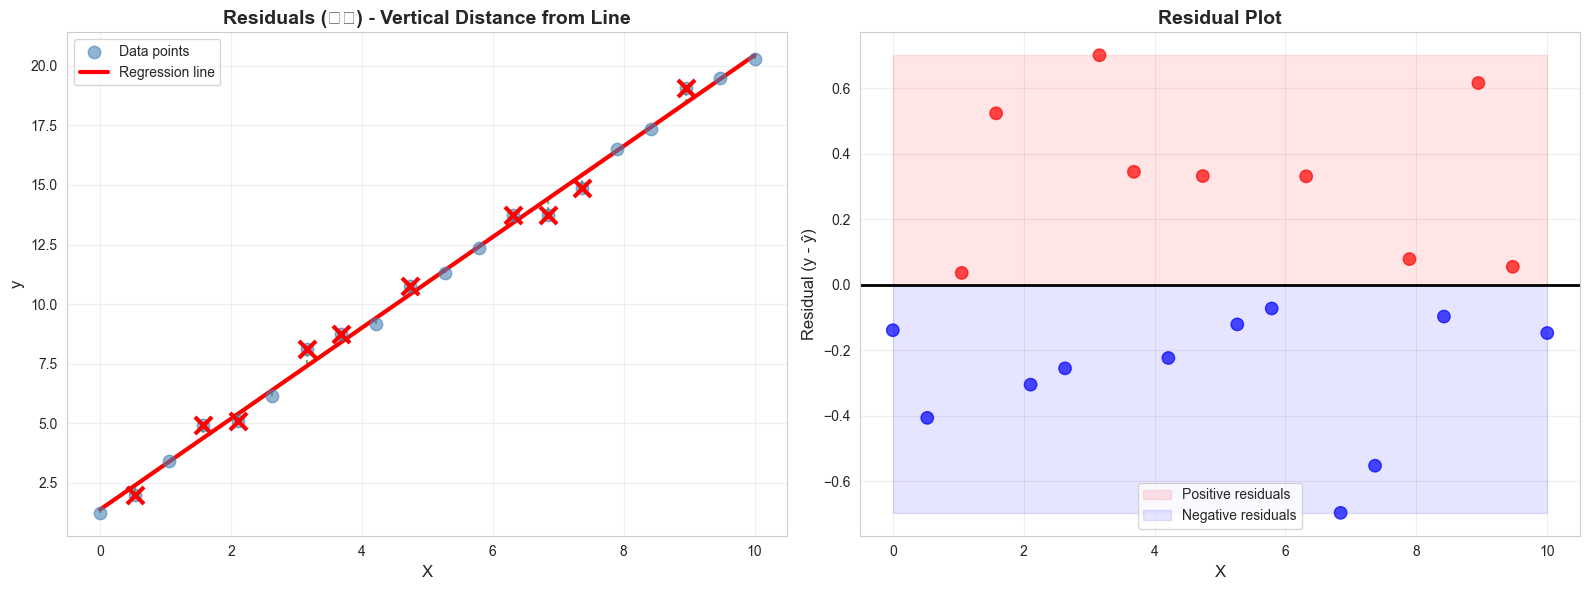

Residuals range: [-0.697, 0.701]
Mean residual: -0.000 (should be close to 0)
Sum of residuals: -0.000 (should be close to 0)


In [ ]:
# Calculate residuals
y_pred = slope_best * X_flat + intercept_best
residuals = y - y_pred

# Visualize residuals
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Residuals as vertical lines
ax1 = axes[0]
ax1.scatter(X_flat, y, c='steelblue', alpha=0.6, s=80, label='Data points', zorder=3)
ax1.plot(X_flat, y_pred, 'r-', linewidth=3, label='Regression line', zorder=2)
for i in range(len(X)):
    ax1.plot([X[i, 0], X[i, 0]], [y[i], y_pred[i]], 'g--', linewidth=1.5, alpha=0.6, zorder=1)
setup_plot(ax1, title='Residuals (잔차) - Vertical Distance from Line')
ax1.legend()

# Residual plot
ax2 = axes[1]
ax2.scatter(X_flat, residuals, c=['red' if r > 0 else 'blue' for r in residuals], alpha=0.7, s=80)
ax2.axhline(y=0, color='black', linestyle='-', linewidth=2)
setup_plot(ax2, ylabel='Residual (y - ŷ)', title='Residual Plot')

plt.tight_layout()
plt.show()
print(f"Residuals: range=[{residuals.min():.3f}, {residuals.max():.3f}], mean={np.mean(residuals):.3f}")


# 3. Squared Error - Individual squared errors

**Squared Error = (Actual y - Predicted y)² = Residual²**

Squaring makes all errors positive and penalizes larger errors more.


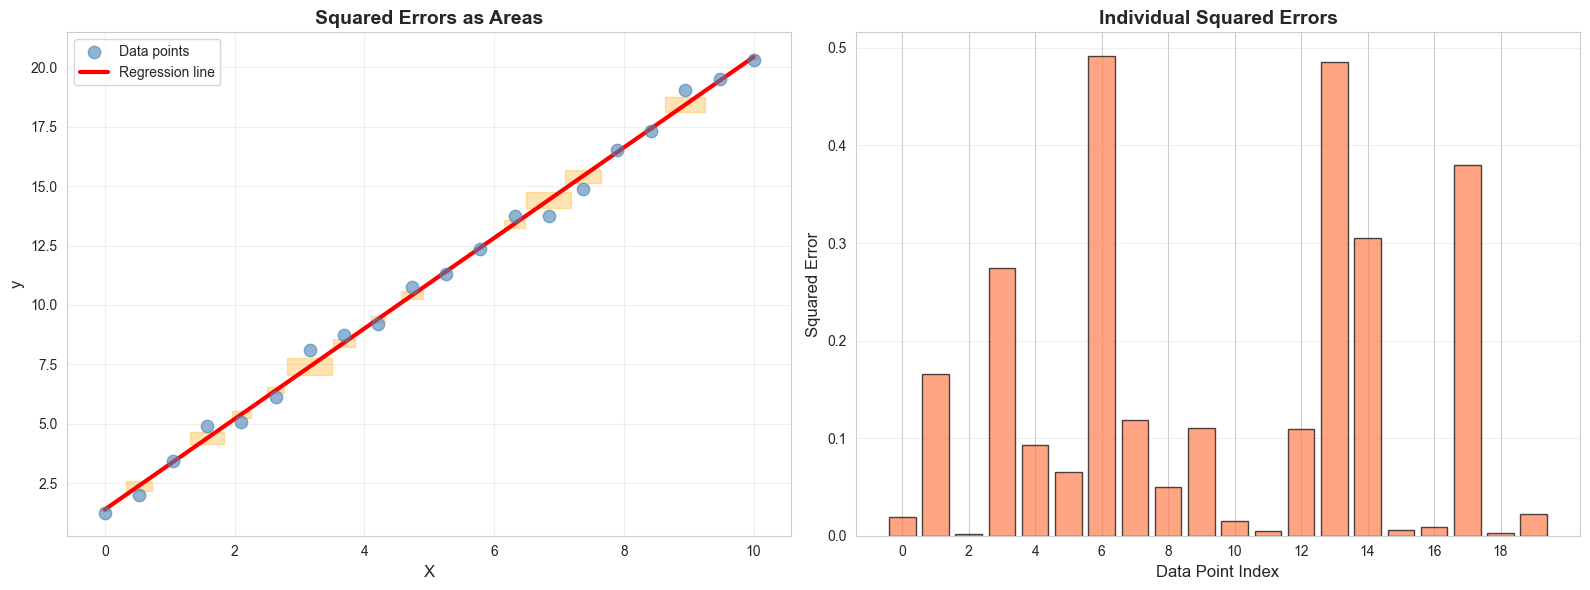

Individual Squared Errors: [0.0193005  0.16535047 0.00130507 0.2741347  0.09316565 0.06524954
 0.49142534 0.11896339 0.0500692  0.11024931 0.01468178 0.00526235
 0.10961818 0.48546407 0.3055756  0.00613224 0.00944411 0.37962947
 0.00300167 0.0217769 ]
Sum of Squared Errors (SSE/SSR): 2.730


In [ ]:
# Visualize squared errors
squared_errors = residuals ** 2
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Squared errors as areas
ax1 = axes[0]
ax1.scatter(X_flat, y, c='steelblue', alpha=0.6, s=80, label='Data points', zorder=3)
ax1.plot(X_flat, y_pred, 'r-', linewidth=3, label='Regression line', zorder=2)
for i in range(len(X)):
    error = abs(residuals[i])
    ax1.add_patch(plt.Rectangle((X[i, 0] - error/2, y_pred[i] - error/2), 
                                error, error, fill=True, alpha=0.3, color='orange', zorder=1))
setup_plot(ax1, title='Squared Errors as Areas')
ax1.legend()

# Bar chart
ax2 = axes[1]
ax2.bar(range(len(X)), squared_errors, alpha=0.7, color='coral', edgecolor='black')
setup_plot(ax2, xlabel='Data Point Index', ylabel='Squared Error', title='Individual Squared Errors')
ax2.set_xticks(range(0, len(X), 2))

plt.tight_layout()
plt.show()
print(f"Sum of Squared Errors (SSR): {np.sum(squared_errors):.3f}")


# 4. Sum of Squared Residuals (SSR) and Total Sum of Squares (SSA)

- **SSR (Sum of Squared Residuals)**: Total prediction error = Σ(y - ŷ)²
- **SSA (Total Sum of Squares)**: Total variation in data = Σ(y - ȳ)²

SSR measures how well the line fits the data. Lower SSR = better fit.


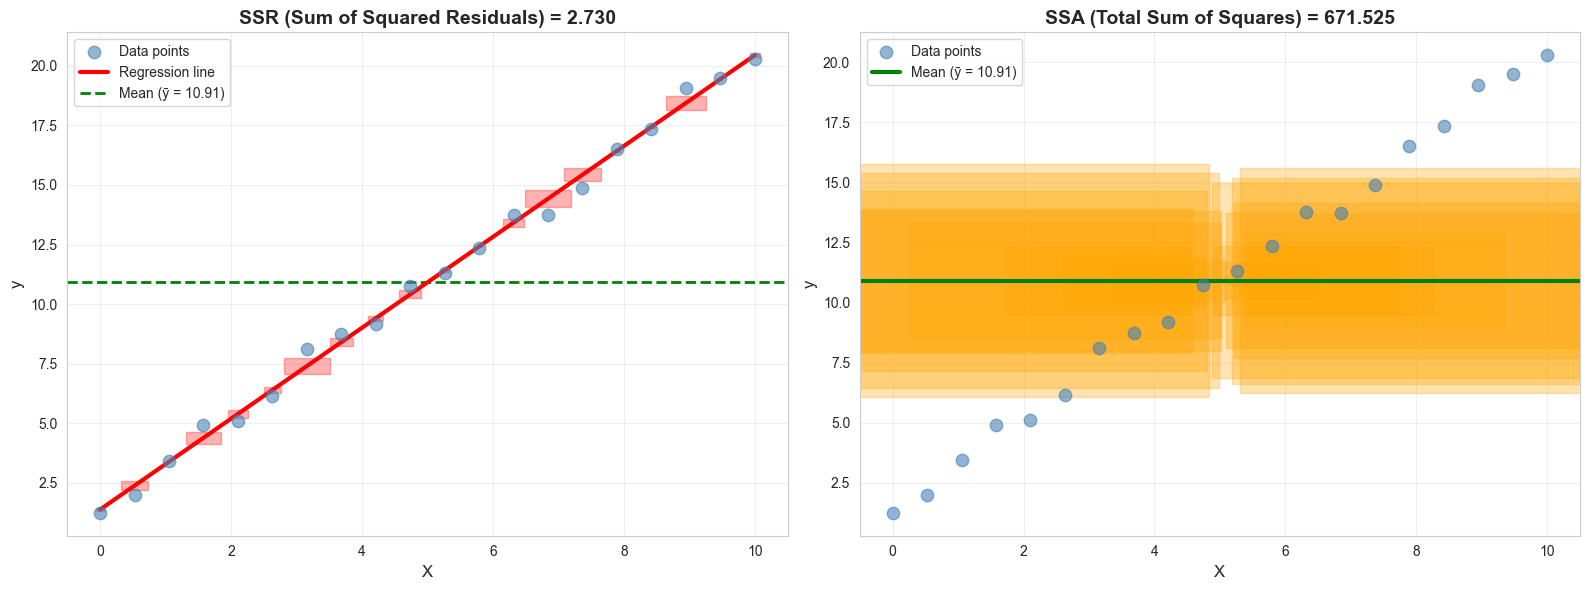

SSR (Sum of Squared Residuals): 2.730
SSA (Total Sum of Squares): 671.525
SSR/SSA ratio: 0.004 (lower is better)


In [ ]:
# Calculate and visualize SSR and SSA
ssr, ssa = compute_ssr_ssa(y, y_pred)
y_mean = np.mean(y)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# SSR
ax1 = axes[0]
ax1.scatter(X_flat, y, c='steelblue', alpha=0.6, s=80, label='Data points', zorder=3)
ax1.plot(X_flat, y_pred, 'r-', linewidth=3, label='Regression line', zorder=2)
ax1.axhline(y=y_mean, color='green', linestyle='--', linewidth=2, label=f'Mean (ȳ = {y_mean:.2f})', zorder=1)
for i in range(len(X)):
    error = abs(residuals[i])
    ax1.add_patch(plt.Rectangle((X[i, 0] - error/2, y_pred[i] - error/2), 
                                error, error, fill=True, alpha=0.3, color='red', zorder=1))
setup_plot(ax1, title=f'SSR (Sum of Squared Residuals) = {ssr:.3f}')
ax1.legend()

# SSA
ax2 = axes[1]
ax2.scatter(X_flat, y, c='steelblue', alpha=0.6, s=80, label='Data points', zorder=3)
ax2.axhline(y=y_mean, color='green', linestyle='-', linewidth=3, label=f'Mean (ȳ = {y_mean:.2f})', zorder=2)
for i in range(len(X)):
    deviation = abs(y[i] - y_mean)
    ax2.add_patch(plt.Rectangle((X[i, 0] - deviation/2, y_mean - deviation/2), 
                                deviation, deviation, fill=True, alpha=0.3, color='orange', zorder=1))
setup_plot(ax2, title=f'SSA (Total Sum of Squares) = {ssa:.3f}')
ax2.legend()

plt.tight_layout()
plt.show()
print(f"SSR: {ssr:.3f}, SSA: {ssa:.3f}, SSR/SSA: {ssr/ssa:.3f}")


# 5. Correlation Coefficient (R) and Coefficient of Determination (R²)

- **R (Correlation Coefficient)**: Measures linear relationship strength (-1 to 1)
- **R² (Coefficient of Determination)**: Proportion of variance explained = 1 - SSR/SSA

R² tells us how well the regression line explains the data variation.


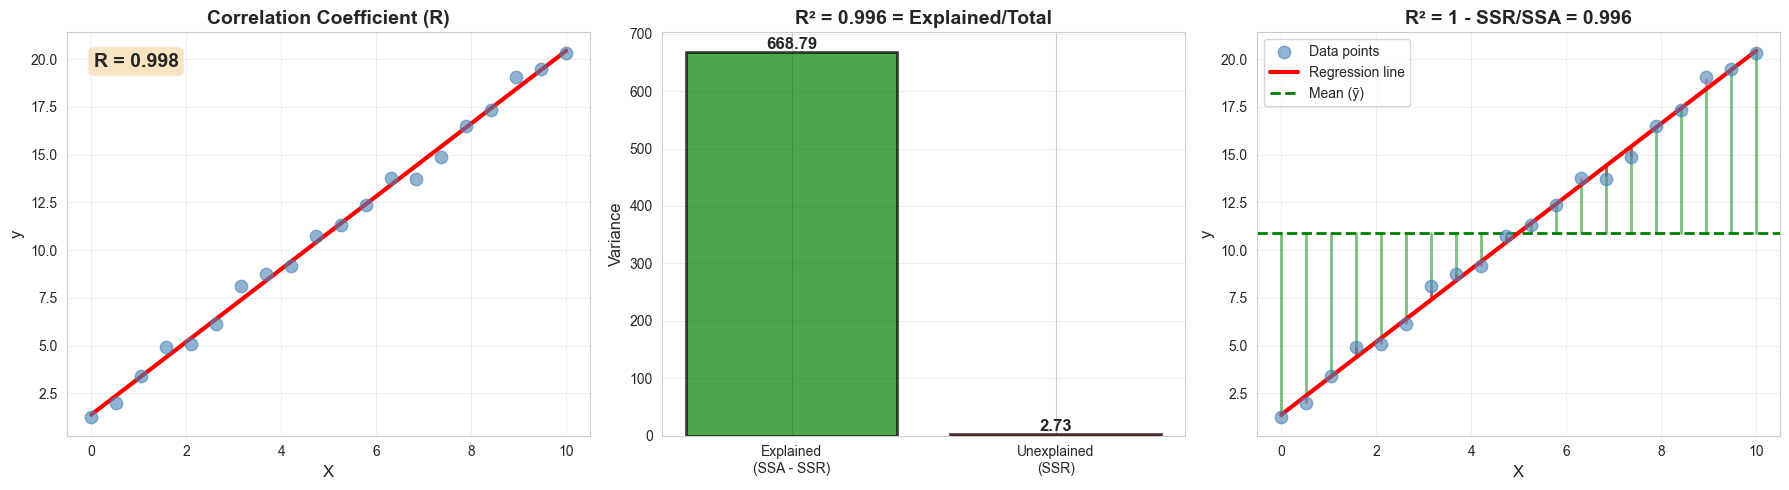

Correlation Coefficient (R): 0.998
Coefficient of Determination (R²): 0.996
R² = 1 - SSR/SSA = 1 - 2.730/671.525 = 0.996

Interpretation:
  R² = 99.6% of the variance in y is explained by the regression line
  0.4% of the variance remains unexplained


In [ ]:
# Calculate and visualize R and R²
r = compute_correlation(X, y)
r_squared, ssr, ssa = compute_r_squared(y, y_pred)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Correlation
ax1 = axes[0]
ax1.scatter(X_flat, y, c='steelblue', alpha=0.6, s=80, zorder=3)
ax1.plot(X_flat, y_pred, 'r-', linewidth=3, zorder=2)
ax1.text(0.05, 0.95, f'R = {r:.3f}', transform=ax1.transAxes, 
        fontsize=14, fontweight='bold', va='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
setup_plot(ax1, title='Correlation Coefficient (R)')

# R² bar chart
ax2 = axes[1]
explained, unexplained = ssa - ssr, ssr
bars = ax2.bar(['Explained\n(SSA - SSR)', 'Unexplained\n(SSR)'], 
               [explained, unexplained], color=['green', 'red'], alpha=0.7, edgecolor='black')
for bar, val in zip(bars, [explained, unexplained]):
    ax2.text(bar.get_x() + bar.get_width()/2., bar.get_height(),
            f'{val:.2f}', ha='center', va='bottom', fontsize=12, fontweight='bold')
setup_plot(ax2, ylabel='Variance', title=f'R² = {r_squared:.3f} = Explained/Total')

# R² formula visualization
ax3 = axes[2]
ax3.scatter(X_flat, y, c='steelblue', alpha=0.6, s=80, label='Data points', zorder=3)
ax3.plot(X_flat, y_pred, 'r-', linewidth=3, label='Regression line', zorder=2)
ax3.axhline(y=y_mean, color='green', linestyle='--', linewidth=2, label='Mean (ȳ)', zorder=1)
for i in range(len(X)):
    ax3.plot([X[i, 0], X[i, 0]], [y_mean, y_pred[i]], 'g-', linewidth=2, alpha=0.5, zorder=1)
    ax3.plot([X[i, 0], X[i, 0]], [y_pred[i], y[i]], 'r--', linewidth=2, alpha=0.5, zorder=1)
setup_plot(ax3, title=f'R² = 1 - SSR/SSA = {r_squared:.3f}')
ax3.legend()

plt.tight_layout()
plt.show()
print(f"R = {r:.3f}, R² = {r_squared:.3f} = 1 - {ssr:.3f}/{ssa:.3f}")
print(f"R² = {r_squared*100:.1f}% of variance explained")


# 6. How Slope Changes Affect SSR, SSA, and R²

As we change the slope, SSR changes (better or worse fit), while SSA stays constant (it only depends on data).


In [ ]:
# Test different slopes
slopes_to_test = np.linspace(0, 4, 20)
ssr_vals, ssa_vals, r2_vals = [], [], []
intercept_fixed = intercept_best

for slope in slopes_to_test:
    r2, ssr_val, ssa_val = compute_r_squared(y, slope * X_flat + intercept_fixed)
    ssr_vals.append(ssr_val)
    ssa_vals.append(ssa_val)
    r2_vals.append(r2)

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# SSR vs Slope
ax1 = axes[0, 0]
ax1.plot(slopes_to_test, ssr_vals, 'r-', linewidth=3, marker='o', markersize=4)
ax1.axvline(x=slope_best, color='green', linestyle='--', linewidth=2, label=f'Optimal = {slope_best:.2f}')
ax1.scatter([slope_best], [ssr], color='green', s=200, marker='*', zorder=5)
setup_plot(ax1, xlabel='Slope (기울기)', ylabel='SSR', title='SSR Changes with Slope')
ax1.legend()

# SSA vs Slope (constant)
ax2 = axes[0, 1]
ax2.plot(slopes_to_test, ssa_vals, 'orange', linewidth=3, marker='o', markersize=4)
ax2.text(0.5, 0.95, f'SSA = {ssa:.3f} (constant)', transform=ax2.transAxes,
        fontsize=12, fontweight='bold', ha='center', va='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
setup_plot(ax2, xlabel='Slope (기울기)', ylabel='SSA', title='SSA is Constant')

# R² vs Slope
ax3 = axes[1, 0]
ax3.plot(slopes_to_test, r2_vals, 'b-', linewidth=3, marker='o', markersize=4)
ax3.axvline(x=slope_best, color='green', linestyle='--', linewidth=2, label=f'Optimal = {slope_best:.2f}')
ax3.scatter([slope_best], [r_squared], color='green', s=200, marker='*', zorder=5)
setup_plot(ax3, xlabel='Slope (기울기)', ylabel='R²', title='R² = 1 - SSR/SSA Changes with Slope')
ax3.set_ylim([0, 1.1])
ax3.legend()

# SSR/SSA ratio
ax4 = axes[1, 1]
ax4.plot(slopes_to_test, np.array(ssr_vals) / np.array(ssa_vals), 'purple', linewidth=3, marker='o', markersize=4)
ax4.axvline(x=slope_best, color='green', linestyle='--', linewidth=2, label=f'Optimal = {slope_best:.2f}')
ax4.scatter([slope_best], [ssr/ssa], color='green', s=200, marker='*', zorder=5)
setup_plot(ax4, xlabel='Slope (기울기)', ylabel='SSR/SSA Ratio', title='SSR/SSA Ratio (Lower is Better)')
ax4.legend()

plt.tight_layout()
plt.show()
print(f"SSR minimized at slope={slope_best:.3f} (SSR={ssr:.3f}), SSA={ssa:.3f} (constant), R²={r_squared:.3f}")


# 7. Gradient Descent: Step-by-Step Learning

Now let's see how the model learns using Gradient Descent - updating weights iteratively to minimize the cost function.


In [ ]:
def visualize_regression_step(X, y, weights, iteration=0, cost=None, ax=None):
    """Visualize regression line and data points."""
    if ax is None:
        _, ax = plt.subplots(figsize=(10, 6))
    x_line = np.linspace(X.min() - 0.5, X.max() + 0.5, 100).reshape(-1, 1)
    y_pred = np.column_stack([np.ones(100), x_line]) @ weights
    
    ax.scatter(X.flatten(), y, c='steelblue', alpha=0.6, s=50, label='Data points', zorder=3)
    ax.plot(x_line, y_pred, 'r-', linewidth=2, label=f'y = {weights[1]:.2f}x + {weights[0]:.2f}', zorder=2)
    title = f'Iteration {iteration}' + (f' (Cost: {cost:.4f})' if cost else '')
    setup_plot(ax, title=title)
    ax.legend()
    return ax

class LinearRegression:
    """
    Simple Linear Regression implementation using Gradient Descent.
    
    Parameters:
    -----------
    learning_rate : float, optional (default=0.01)
        Learning rate for gradient descent
    max_iters : int, optional (default=100)
        Maximum number of iterations
    random_state : int, optional
        Random seed for reproducibility
    """
    def __init__(self, learning_rate=0.01, max_iters=100, random_state=None):
        self.learning_rate = learning_rate
        self.max_iters = max_iters
        self.random_state = random_state
        self.weights_ = None
        self.cost_history_ = []
        
    def _add_bias(self, X):
        """Add bias term (intercept) to features."""
        return np.column_stack([np.ones(X.shape[0]), X])
    
    def _compute_cost(self, X, y, weights):
        """Compute Mean Squared Error (MSE)."""
        predictions = X @ weights
        mse = np.mean((predictions - y) ** 2)
        return mse
    
    def _compute_gradient(self, X, y, weights):
        """Compute gradient of MSE."""
        n_samples = X.shape[0]
        predictions = X @ weights
        error = predictions - y
        gradient = (2 / n_samples) * X.T @ error
        return gradient
    
    def fit(self, X, y, visualization=True):
        """
        Fit linear regression model to the data.
        
        Parameters:
        -----------
        X : array-like of shape (n_samples, n_features)
            Training data
        y : array-like of shape (n_samples,)
            Target values
        visualization : bool
            Whether to visualize each iteration
        """
        X = self._add_bias(X)
        n_samples, n_features = X.shape
        
        # Initialize weights randomly
        np.random.seed(self.random_state)
        self.weights_ = np.random.randn(n_features) * 0.5
        
        self.cost_history_ = []
        
        # Main gradient descent loop
        for i in range(self.max_iters):
            # Compute cost
            cost = self._compute_cost(X, y, self.weights_)
            self.cost_history_.append(cost)
            
            # Compute gradient
            gradient = self._compute_gradient(X, y, self.weights_)
            
            # Update weights
            self.weights_ -= self.learning_rate * gradient
            
            if visualization:
                clear_output(wait=True)
                fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
                visualize_regression_step(X[:, 1:], y, self.weights_, iteration=i+1, cost=cost, ax=ax1)
                ax2.plot(self.cost_history_, 'b-', linewidth=2)
                setup_plot(ax2, xlabel='Iteration', ylabel='Cost (MSE)', title='Cost Function Convergence')
                plt.tight_layout()
                display(fig)
                plt.close(fig)
            
            # Check convergence
            if len(self.cost_history_) > 1:
                if abs(self.cost_history_[-2] - self.cost_history_[-1]) < 1e-6:
                    break
        
        return self
    
    def predict(self, X):
        """Make predictions using the fitted model."""
        X = self._add_bias(X)
        return X @ self.weights_


In [ ]:
# Final visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
visualize_regression_step(X_gd, y_gd, model_gd.weights_, iteration="Final", 
                         cost=model_gd.cost_history_[-1], ax=axes[0])
axes[1].plot(model_gd.cost_history_, 'b-', linewidth=2, marker='o', markersize=4)
setup_plot(axes[1], xlabel='Iteration', ylabel='Cost (MSE)', title='Cost Function Convergence')
plt.tight_layout()
plt.show()


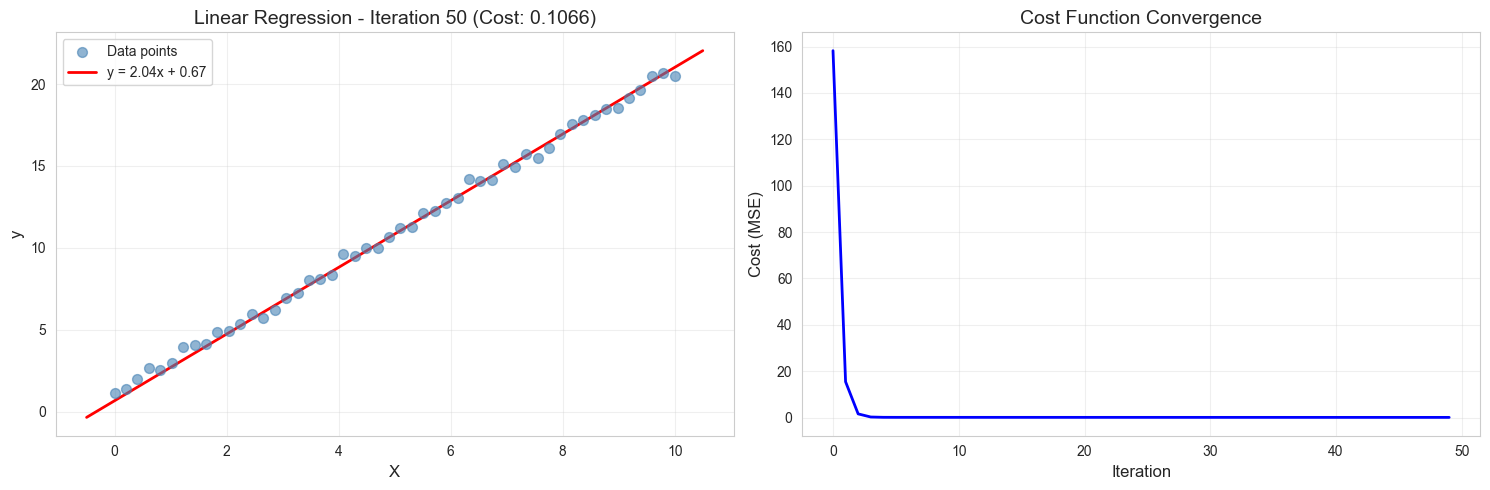


Final Weights: [bias=0.6668, slope=2.0353]
Final Cost (MSE): 0.1066
True line was: y = 2.0*x + 1.0


In [ ]:
# Gradient Descent with step-by-step visualization
X_gd, y_gd = generate_data(n_samples=50, noise=0.3, random_state=42)
model_gd = LinearRegression(learning_rate=0.01, max_iters=50, random_state=42)
model_gd.fit(X_gd, y_gd, visualization=True)

print(f"Final: [bias={model_gd.weights_[0]:.4f}, slope={model_gd.weights_[1]:.4f}], Cost={model_gd.cost_history_[-1]:.4f}")
